# Exploratory Data Analysis

In [1]:
import sys
import os
sys.path.append(os.path.abspath('../scripts'))
import missingno as msno
import pandas as pd 
from utils import * 
import matplotlib.pyplot as plt
import seaborn as sns

## Data Summary

In [2]:
# Load Data
df = load_data()


In [3]:
df.head()

,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,Bank,AccountType,MaritalStatus,Gender,Country,Province,PostalCode,MainCrestaZone,SubCrestaZone,ItemType,mmcode,VehicleType,RegistrationYear,make,Model,Cylinders,cubiccapacity,kilowatts,bodytype,NumberOfDoors,VehicleIntroDate,CustomValueEstimate,AlarmImmobiliser,TrackingDevice,CapitalOutstanding,NewVehicle,WrittenOff,Rebuilt,Converted,CrossBorder,NumberOfVehiclesInFleet,SumInsured,TermFrequency,CalculatedPremiumPerTerm,ExcessSelected,CoverCategory,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims
0,145249,12827,2015-03-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,Not specified,Not specified,South Africa,Gauteng,1459,Rand East,Rand East,Mobility - Motor,44069150.0,Passenger Vehicle,2004,MERCEDES-BENZ,E 240,6.0,2597.0,130.0,S/D,4.0,6/2002,119300.0,Yes,No,119300,More than 6 months,NaN,NaN,NaN,NaN,NaN,0.01,Monthly,25.0000,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
1,145249,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,Not specified,Not specified,South Africa,Gauteng,1459,Rand East,Rand East,Mobility - Motor,44069150.0,Passenger Vehicle,2004,MERCEDES-BENZ,E 240,6.0,2597.0,130.0,S/D,4.0,6/2002,119300.0,Yes,No,119300,More than 6 months,NaN,NaN,NaN,NaN,NaN,0.01,Monthly,25.0000,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
2,145249,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,Not specified,Not specified,South Africa,Gauteng,1459,Rand East,Rand East,Mobility - Motor,44069150.0,Passenger Vehicle,2004,MERCEDES-BENZ,E 240,6.0,2597.0,130.0,S/D,4.0,6/2002,119300.0,Yes,No,119300,More than 6 months,NaN,NaN,NaN,NaN,NaN,0.01,Monthly,25.0000,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0
3,145255,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,Not specified,Not specified,South Africa,Gauteng,1459,Rand East,Rand East,Mobility - Motor,44069150.0,Passenger Vehicle,2004,MERCEDES-BENZ,E 240,6.0,2597.0,130.0,S/D,4.0,6/2002,119300.0,Yes,No,119300,More than 6 months,NaN,NaN,NaN,NaN,NaN,119300.00,Monthly,584.6468,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,512.848070,0.0
4,145255,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,Not specified,Not specified,South Africa,Gauteng,1459,Rand East,Rand East,Mobility - Motor,44069150.0,Passenger Vehicle,2004,MERCEDES-BENZ,E 240,6.0,2597.0,130.0,S/D,4.0,6/2002,119300.0,Yes,No,119300,More than 6 months,NaN,NaN,NaN,NaN,NaN,119300.00,Monthly,584.6468,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0


In [6]:
df.shape

(1000098, 52)

In [4]:
df.describe()

,UnderwrittenCoverID,PolicyID,PostalCode,mmcode,RegistrationYear,Cylinders,cubiccapacity,kilowatts,NumberOfDoors,CustomValueEstimate,NumberOfVehiclesInFleet,SumInsured,CalculatedPremiumPerTerm,TotalPremium,TotalClaims
count,1.000098e+06,1.000098e+06,1.000098e+06,9.995460e+05,1.000098e+06,999546.000000,999546.000000,999546.000000,999546.000000,2.204560e+05,0.0,1.000098e+06,1.000098e+06,1.000098e+06,1.000098e+06
mean,1.048175e+05,7.956682e+03,3.020601e+03,5.487770e+07,2.010225e+03,4.046642,2466.743258,97.207919,4.019250,2.255311e+05,NaN,6.041727e+05,1.178757e+02,6.190550e+01,6.486119e+01
std,6.329371e+04,5.290039e+03,2.649854e+03,1.360381e+07,3.261391e+00,0.294020,442.800640,19.393256,0.468314,5.645157e+05,NaN,1.508332e+06,3.997017e+02,2.302845e+02,2.384075e+03
min,1.000000e+00,1.400000e+01,1.000000e+00,4.041200e+06,1.987000e+03,0.000000,0.000000,0.000000,0.000000,2.000000e+04,NaN,1.000000e-02,0.000000e+00,-7.825768e+02,-1.200241e+04
25%,5.514300e+04,4.500000e+03,8.270000e+02,6.005692e+07,2.008000e+03,4.000000,2237.000000,75.000000,4.000000,1.350000e+05,NaN,5.000000e+03,3.224800e+00,0.000000e+00,0.000000e+00
50%,9.408300e+04,7.071000e+03,2.000000e+03,6.005842e+07,2.011000e+03,4.000000,2694.000000,111.000000,4.000000,2.200000e+05,NaN,7.500000e+03,8.436900e+00,2.178333e+00,0.000000e+00
75%,1.391900e+05,1.107700e+04,4.180000e+03,6.005842e+07,2.013000e+03,4.000000,2694.000000,111.000000,4.000000,2.800000e+05,NaN,2.500000e+05,9.000000e+01,2.192982e+01,0.000000e+00
max,3.011750e+05,2.324600e+04,9.870000e+03,6.506535e+07,2.015000e+03,10.000000,12880.000000,309.000000,6.000000,2.655000e+07,NaN,1.263620e+07,7.442217e+04,6.528260e+04,3.930921e+05


In [5]:
df.describe(include=['object'])

,TransactionMonth,Citizenship,LegalType,Title,Language,Bank,AccountType,MaritalStatus,Gender,Country,Province,MainCrestaZone,SubCrestaZone,ItemType,VehicleType,make,Model,bodytype,VehicleIntroDate,AlarmImmobiliser,TrackingDevice,CapitalOutstanding,NewVehicle,WrittenOff,Rebuilt,Converted,CrossBorder,TermFrequency,ExcessSelected,CoverCategory,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType
count,1000098,1000098,1000098,1000098,1000098,854137,959866,991839,990562,1000098,1000098,1000098,1000098,1000098,999546,999546,999546,999546,999546,1000098,1000098,1000096,846803,358197,358197,358197,698,1000098,1000098,1000098,1000098,1000098,1000098,1000098,1000098,1000098
unique,23,4,6,5,1,11,3,3,3,1,9,16,45,1,5,46,411,13,174,2,2,659,2,2,2,2,1,2,13,28,22,14,5,4,1,1
top,2015-08-01 00:00:00,,Individual,Mr,English,First National Bank,Current account,Not specified,Not specified,South Africa,Gauteng,Transvaal (all except Pretoria),Johannesburg,Mobility - Motor,Passenger Vehicle,TOYOTA,QUANTUM 2.7 SESFIKILE 16s,B/S,4/2012,Yes,No,0,More than 6 months,No,No,No,No,Monthly,No excess,Passenger Liability,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Commercial Cover: Monthly,Commercial,IFRS Constant
freq,106747,895210,911929,933555,1000098,260811,597938,986208,940990,1000098,393865,296187,176020,1000098,933598,813280,186087,844400,287638,999861,656617,779482,845223,358165,358165,358110,698,999554,791235,104158,104183,824124,828125,915028,1000098,1000098


In [4]:
df.columns

Index(['UnderwrittenCoverID', 'PolicyID', 'TransactionMonth',
       'IsVATRegistered', 'Citizenship', 'LegalType', 'Title', 'Language',
       'Bank', 'AccountType', 'MaritalStatus', 'Gender', 'Country', 'Province',
       'PostalCode', 'MainCrestaZone', 'SubCrestaZone', 'ItemType', 'mmcode',
       'VehicleType', 'RegistrationYear', 'make', 'Model', 'Cylinders',
       'cubiccapacity', 'kilowatts', 'bodytype', 'NumberOfDoors',
       'VehicleIntroDate', 'CustomValueEstimate', 'AlarmImmobiliser',
       'TrackingDevice', 'CapitalOutstanding', 'NewVehicle', 'WrittenOff',
       'Rebuilt', 'Converted', 'CrossBorder', 'NumberOfVehiclesInFleet',
       'SumInsured', 'TermFrequency', 'CalculatedPremiumPerTerm',
       'ExcessSelected', 'CoverCategory', 'CoverType', 'CoverGroup', 'Section',
       'Product', 'StatutoryClass', 'StatutoryRiskType', 'TotalPremium',
       'TotalClaims'],
      dtype='object')

## Data Type of Variables 

-  **Checking data types**

In [3]:
column_categories = column_catagorize(df)



 Numeric columns: ['UnderwrittenCoverID', 'PolicyID', 'IsVATRegistered', 'PostalCode', 'mmcode', 'RegistrationYear', 'Cylinders', 'cubiccapacity', 'kilowatts', 'NumberOfDoors', 'CustomValueEstimate', 'NumberOfVehiclesInFleet', 'SumInsured', 'CalculatedPremiumPerTerm', 'TotalPremium', 'TotalClaims'] 

 Categorical columns: [] 

 Datetime columns: [] 

 Object columns: ['TransactionMonth', 'Citizenship', 'LegalType', 'Title', 'Language', 'Bank', 'AccountType', 'MaritalStatus', 'Gender', 'Country', 'Province', 'MainCrestaZone', 'SubCrestaZone', 'ItemType', 'VehicleType', 'make', 'Model', 'bodytype', 'VehicleIntroDate', 'AlarmImmobiliser', 'TrackingDevice', 'CapitalOutstanding', 'NewVehicle', 'WrittenOff', 'Rebuilt', 'Converted', 'CrossBorder', 'TermFrequency', 'ExcessSelected', 'CoverCategory', 'CoverType', 'CoverGroup', 'Section', 'Product', 'StatutoryClass', 'StatutoryRiskType'] 


In [7]:
categorical_columns = column_categories['object']
# Get the number of unique values for each categorical column
unique_counts = {col: df[col].nunique() for col in categorical_columns}

# Print the unique counts
for col, count in unique_counts.items():
    print(f"{col}: {count} unique values")

TransactionMonth: 23 unique values
Citizenship: 4 unique values
LegalType: 6 unique values
Title: 5 unique values
Language: 1 unique values
Bank: 11 unique values
AccountType: 3 unique values
MaritalStatus: 3 unique values
Gender: 3 unique values
Country: 1 unique values
Province: 9 unique values
MainCrestaZone: 16 unique values
SubCrestaZone: 45 unique values
ItemType: 1 unique values
VehicleType: 5 unique values
make: 46 unique values
Model: 411 unique values
bodytype: 13 unique values
VehicleIntroDate: 174 unique values
AlarmImmobiliser: 2 unique values
TrackingDevice: 2 unique values
CapitalOutstanding: 659 unique values
NewVehicle: 2 unique values
WrittenOff: 2 unique values
Rebuilt: 2 unique values
Converted: 2 unique values
CrossBorder: 1 unique values
TermFrequency: 2 unique values
ExcessSelected: 13 unique values
CoverCategory: 28 unique values
CoverType: 22 unique values
CoverGroup: 14 unique values
Section: 5 unique values
Product: 4 unique values
StatutoryClass: 1 unique va

In [8]:
categorical_columns = column_categories['numeric']
# Get the number of unique values for each numeric column
unique_counts = {col: df[col].nunique() for col in categorical_columns}

# Print the unique counts
for col, count in unique_counts.items():
    print(f"{col}: {count} unique values")

UnderwrittenCoverID: 116532 unique values
PolicyID: 7000 unique values
IsVATRegistered: 2 unique values
PostalCode: 888 unique values
mmcode: 427 unique values
RegistrationYear: 25 unique values
Cylinders: 7 unique values
cubiccapacity: 122 unique values
kilowatts: 82 unique values
NumberOfDoors: 6 unique values
CustomValueEstimate: 923 unique values
NumberOfVehiclesInFleet: 0 unique values
SumInsured: 2186 unique values
CalculatedPremiumPerTerm: 19869 unique values
TotalPremium: 38959 unique values
TotalClaims: 1615 unique values


### Converting to catagorical

In [3]:
# Change columns data type to catagory 
to_categorical(df)

df.dtypes

UnderwrittenCoverID         category
PolicyID                    category
TransactionMonth              object
IsVATRegistered                 bool
Citizenship                 category
LegalType                   category
Title                       category
Language                    category
Bank                        category
AccountType                 category
MaritalStatus               category
Gender                      category
Country                     category
Province                    category
PostalCode                  category
MainCrestaZone              category
SubCrestaZone               category
ItemType                    category
mmcode                      category
VehicleType                 category
RegistrationYear            category
make                        category
Model                       category
Cylinders                   category
cubiccapacity                float64
kilowatts                    float64
bodytype                    category
N

In [10]:
print("\n Unique values in RegistrationYear:")
print(df['RegistrationYear'].unique())
print(df['RegistrationYear'].nunique())

print("\n Unique values in TransactionMonth:")
print(df['TransactionMonth'].unique())
print(df['TransactionMonth'].nunique())

print("\n Unique values in VehicleIntroDate:")
print(df['VehicleIntroDate'].unique()[:25])
print(df['VehicleIntroDate'].nunique())


 Unique values in RegistrationYear:
[2004, 2006, 2009, 2011, 2007, ..., 2002, 1996, 1992, 1987, 1988]
Length: 25
Categories (25, int64): [1987, 1988, 1992, 1994, ..., 2012, 2013, 2014, 2015]
25

 Unique values in TransactionMonth:
['2015-03-01 00:00:00' '2015-05-01 00:00:00' '2015-07-01 00:00:00'
 '2015-01-01 00:00:00' '2015-04-01 00:00:00' '2015-06-01 00:00:00'
 '2015-08-01 00:00:00' '2015-02-01 00:00:00' '2014-12-01 00:00:00'
 '2014-11-01 00:00:00' '2014-10-01 00:00:00' '2014-09-01 00:00:00'
 '2014-07-01 00:00:00' '2014-08-01 00:00:00' '2014-03-01 00:00:00'
 '2014-05-01 00:00:00' '2014-04-01 00:00:00' '2014-06-01 00:00:00'
 '2014-02-01 00:00:00' '2013-12-01 00:00:00' '2013-11-01 00:00:00'
 '2014-01-01 00:00:00' '2013-10-01 00:00:00']
23

 Unique values in VehicleIntroDate:
['6/2002' '3/2004' '2/2003' '6/2005' '2008/11/01 12:00:00 AM' '11/2010'
 '2008/08/01 12:00:00 AM' '5/2004' '2/2006' '8/2005'
 '2013/04/01 12:00:00 AM' '4/2007' '1/2012' '11/2006' '11/2007' '10/2010'
 '4/2012' '8/2

- **Converting to DateTime**

In [4]:
# Convert  to datetime
df['TransactionMonth'] = pd.to_datetime(df['TransactionMonth'])
df['VehicleIntroDate'] = pd.to_datetime(df['VehicleIntroDate'])


C:\Users\Yoseph\AppData\Local\Temp\ipykernel_24432\3478966126.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['VehicleIntroDate'] = pd.to_datetime(df['VehicleIntroDate'])


- **Convert to numeric**

In [5]:
#  Remove commas and convert to numeric
df['CapitalOutstanding'] = df['CapitalOutstanding'].str.replace(',', '').astype(float)

## Handling Missing Values

In [7]:
missing_values_table(df)

Your selected dataframe has 52 columns.
There are 22 columns that have missing values.


,Missing Values,% of Total Values,Dtype,Values,Unique Values
NumberOfVehiclesInFleet,1000098,100.0,float64,0,0
CrossBorder,999400,99.9,object,698,1
CustomValueEstimate,779642,78.0,float64,220456,923
WrittenOff,641901,64.2,category,358197,2
Converted,641901,64.2,category,358197,2
Rebuilt,641901,64.2,category,358197,2
NewVehicle,153295,15.3,category,846803,2
Bank,145961,14.6,category,854137,11
AccountType,40232,4.0,category,959866,3
Gender,9536,1.0,category,990562,3


In [6]:
dff = handling_missing_values(df)

- **Check If it is handled correctly**

In [7]:
missing_values_table(dff)

Your selected dataframe has 50 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values,Dtype,Values,Unique Values


In [8]:
non_missing_values_table(dff)

Your selected DataFrame has 50 columns.
There are 50 columns that have no missing values.


,Column Name,Data Type,Total Values,Unique Values
0,UnderwrittenCoverID,category,999544,116468
1,PolicyID,category,999544,6996
2,TransactionMonth,datetime64[ns],999544,23
3,IsVATRegistered,bool,999544,2
4,Citizenship,category,999544,4
5,LegalType,category,999544,6
6,Title,category,999544,5
7,Language,category,999544,1
8,Bank,category,999544,11
9,AccountType,category,999544,3


## Exploring Negative values and Duplicates

In [9]:
# check for negative values 
numeric_df = dff.select_dtypes(include='number')
negative_values = (numeric_df < 0).any()
negative_values

cubiccapacity               False
kilowatts                   False
CustomValueEstimate         False
CapitalOutstanding           True
SumInsured                  False
CalculatedPremiumPerTerm    False
TotalPremium                 True
TotalClaims                  True
dtype: bool

In [10]:
# Check for duplicates
duplicates = dff.duplicated()
# Count duplicates
duplicate_count = duplicates.sum()
print(f"Number of duplicate rows: {duplicate_count}")
duplicates = dff[dff.duplicated()]
duplicates.head()

Number of duplicate rows: 74


,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,Bank,AccountType,MaritalStatus,Gender,Country,Province,PostalCode,MainCrestaZone,SubCrestaZone,ItemType,mmcode,VehicleType,RegistrationYear,make,Model,Cylinders,cubiccapacity,kilowatts,bodytype,NumberOfDoors,VehicleIntroDate,CustomValueEstimate,AlarmImmobiliser,TrackingDevice,CapitalOutstanding,NewVehicle,WrittenOff,Rebuilt,Converted,SumInsured,TermFrequency,CalculatedPremiumPerTerm,ExcessSelected,CoverCategory,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims
140792,92857,5279,2015-03-01,False,,Individual,Mr,English,ABSA Bank,Savings account,Not specified,Not specified,South Africa,Gauteng,1863,Transvaal (all except Pretoria),Transvaal South,Mobility - Motor,60058415.0,Passenger Vehicle,2007,TOYOTA,QUANTUM 2.7 SESFIKILE 14s,4.0,2694.0,111.0,B/S,4.0,2007-11-01,225531.129942,Yes,No,0.0,More than 6 months,No,No,No,7000.00,Monthly,85.0000,No excess,Income Protector,Income Protector,Income Protector,Optional Extended Covers,Mobility Commercial Cover: Monthly,Commercial,IFRS Constant,33.672892,0.0
140819,68955,5279,2015-08-01,False,,Individual,Mr,English,ABSA Bank,Savings account,Not specified,Not specified,South Africa,Gauteng,1863,Transvaal (all except Pretoria),Transvaal South,Mobility - Motor,60058415.0,Passenger Vehicle,2007,TOYOTA,QUANTUM 2.7 SESFIKILE 14s,4.0,2694.0,111.0,B/S,4.0,2007-11-01,225531.129942,Yes,No,0.0,More than 6 months,No,No,No,7500.00,Monthly,90.0000,No excess,Basic Excess Waiver,Basic Excess Waiver,Basic Excess Waiver,Optional Extended Covers,Mobility Commercial Cover: Monthly,Commercial,IFRS Constant,0.000000,0.0
142437,68954,5279,2015-03-01,False,,Individual,Mr,English,ABSA Bank,Savings account,Not specified,Not specified,South Africa,Gauteng,1863,Transvaal (all except Pretoria),Transvaal South,Mobility - Motor,60058415.0,Passenger Vehicle,2007,TOYOTA,QUANTUM 2.7 SESFIKILE 14s,4.0,2694.0,111.0,B/S,4.0,2007-11-01,225531.129942,Yes,No,0.0,More than 6 months,No,No,No,0.01,Monthly,25.0000,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Commercial Cover: Monthly,Commercial,IFRS Constant,9.903792,0.0
147024,92857,5279,2015-08-01,False,,Individual,Mr,English,ABSA Bank,Savings account,Not specified,Not specified,South Africa,Gauteng,1863,Transvaal (all except Pretoria),Transvaal South,Mobility - Motor,60058415.0,Passenger Vehicle,2007,TOYOTA,QUANTUM 2.7 SESFIKILE 14s,4.0,2694.0,111.0,B/S,4.0,2007-11-01,225531.129942,Yes,No,0.0,More than 6 months,No,No,No,7000.00,Monthly,85.0000,No excess,Income Protector,Income Protector,Income Protector,Optional Extended Covers,Mobility Commercial Cover: Monthly,Commercial,IFRS Constant,0.000000,0.0
724410,133274,11364,2015-05-01,False,,Individual,Mr,English,Standard Bank,Savings account,Not specified,Not specified,South Africa,Western Cape,7580,Karoo 1 (Northeast of Cape Town),Northeast of CT,Mobility - Motor,60058415.0,Passenger Vehicle,2006,TOYOTA,QUANTUM 2.7 SESFIKILE 14s,4.0,2694.0,111.0,B/S,4.0,2007-11-01,97000.000000,Yes,Yes,0.0,More than 6 months,No,No,No,3500.00,Monthly,1.5553,No excess,Signage and Vehicle Wraps,Signage and Vehicle Wraps,Comprehensive - Taxi,Motor Comprehensive,Mobility Commercial Cover: Monthly,Commercial,IFRS Constant,0.000000,0.0


In [11]:
# dff_cleaned = dff.drop_duplicates(keep='first')  # Keeps the first occurrence

In [13]:
dff.describe()

,TransactionMonth,cubiccapacity,kilowatts,VehicleIntroDate,CustomValueEstimate,CapitalOutstanding,SumInsured,CalculatedPremiumPerTerm,TotalPremium,TotalClaims
count,999544,999544.000000,999544.000000,999544,9.995440e+05,9.995440e+05,9.995440e+05,999544.000000,999544.000000,999544.000000
mean,2015-02-28 10:32:53.181370368,2466.743461,97.207964,2008-04-20 17:13:52.469206016,2.255311e+05,6.164425e+04,6.038605e+05,116.161425,61.372350,64.340199
min,2013-10-01 00:00:00,0.000000,0.000000,1977-10-01 00:00:00,2.000000e+04,-2.000000e+00,1.000000e-02,0.000000,-782.576754,-12002.412281
25%,2015-01-01 00:00:00,2237.000000,75.000000,2007-11-01 00:00:00,2.255311e+05,0.000000e+00,5.000000e+03,3.225700,0.000000,0.000000
50%,2015-04-01 00:00:00,2694.000000,111.000000,2010-10-01 00:00:00,2.255311e+05,0.000000e+00,7.500000e+03,8.436900,2.179737,0.000000
75%,2015-06-01 00:00:00,2694.000000,111.000000,2012-04-01 00:00:00,2.255311e+05,0.000000e+00,2.500000e+05,90.000000,21.929825,0.000000
max,2015-08-01 00:00:00,12880.000000,309.000000,2014-09-01 00:00:00,2.655000e+07,2.857000e+07,1.000000e+07,3051.821100,2253.507281,393092.105263
std,NaN,442.801023,19.393250,NaN,2.651156e+05,5.156820e+05,1.507329e+06,220.576166,157.014098,2369.567085


## Detecting  Outliers

In [8]:
# Check for outliers and print the counts
lower_bounds, upper_bounds, outlier_counts = count_outliers_iqr(dff)

# Print outlier counts for each column
for column, count in outlier_counts.items():
    print(f"Number of outliers in column '{column}': {count}")


Number of outliers in column 'cubiccapacity': 56939
Number of outliers in column 'kilowatts': 2175
Number of outliers in column 'CustomValueEstimate': 220456
Number of outliers in column 'CapitalOutstanding': 207316
Number of outliers in column 'SumInsured': 104200
Number of outliers in column 'CalculatedPremiumPerTerm': 175426
Number of outliers in column 'TotalPremium': 208966
Number of outliers in column 'TotalClaims': 2780


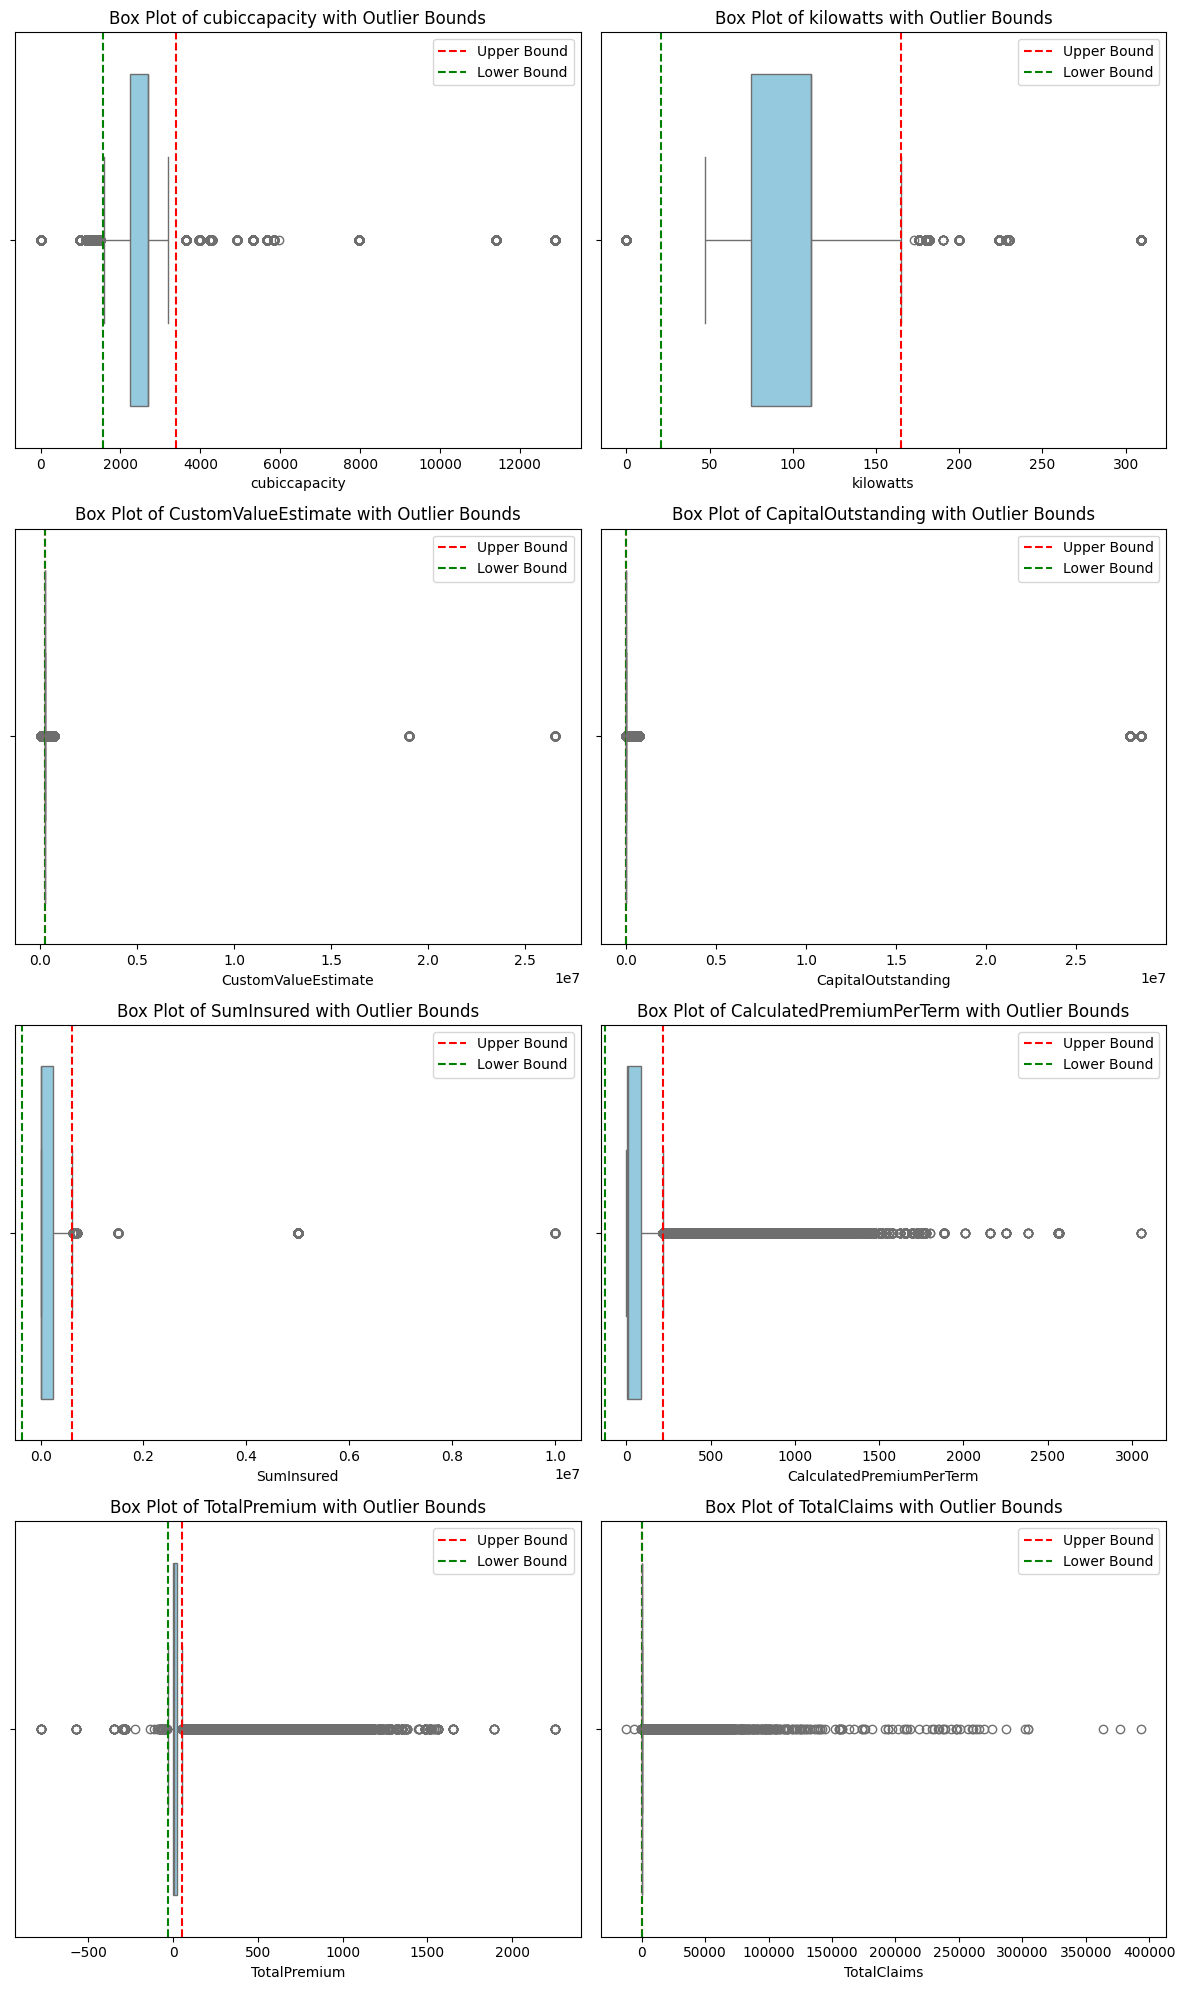

In [9]:
plot_box_outliers(dff, lower_bounds, upper_bounds, outlier_counts)

c:\Users\Yoseph\Desktop\KAIM\Car-Insurance-Risk-Analysis\scripts\utils.py:275: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()  # Adjust layout for better spacing
c:\Users\Yoseph\Desktop\KAIM\Car-Insurance-Risk-Analysis\.week3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


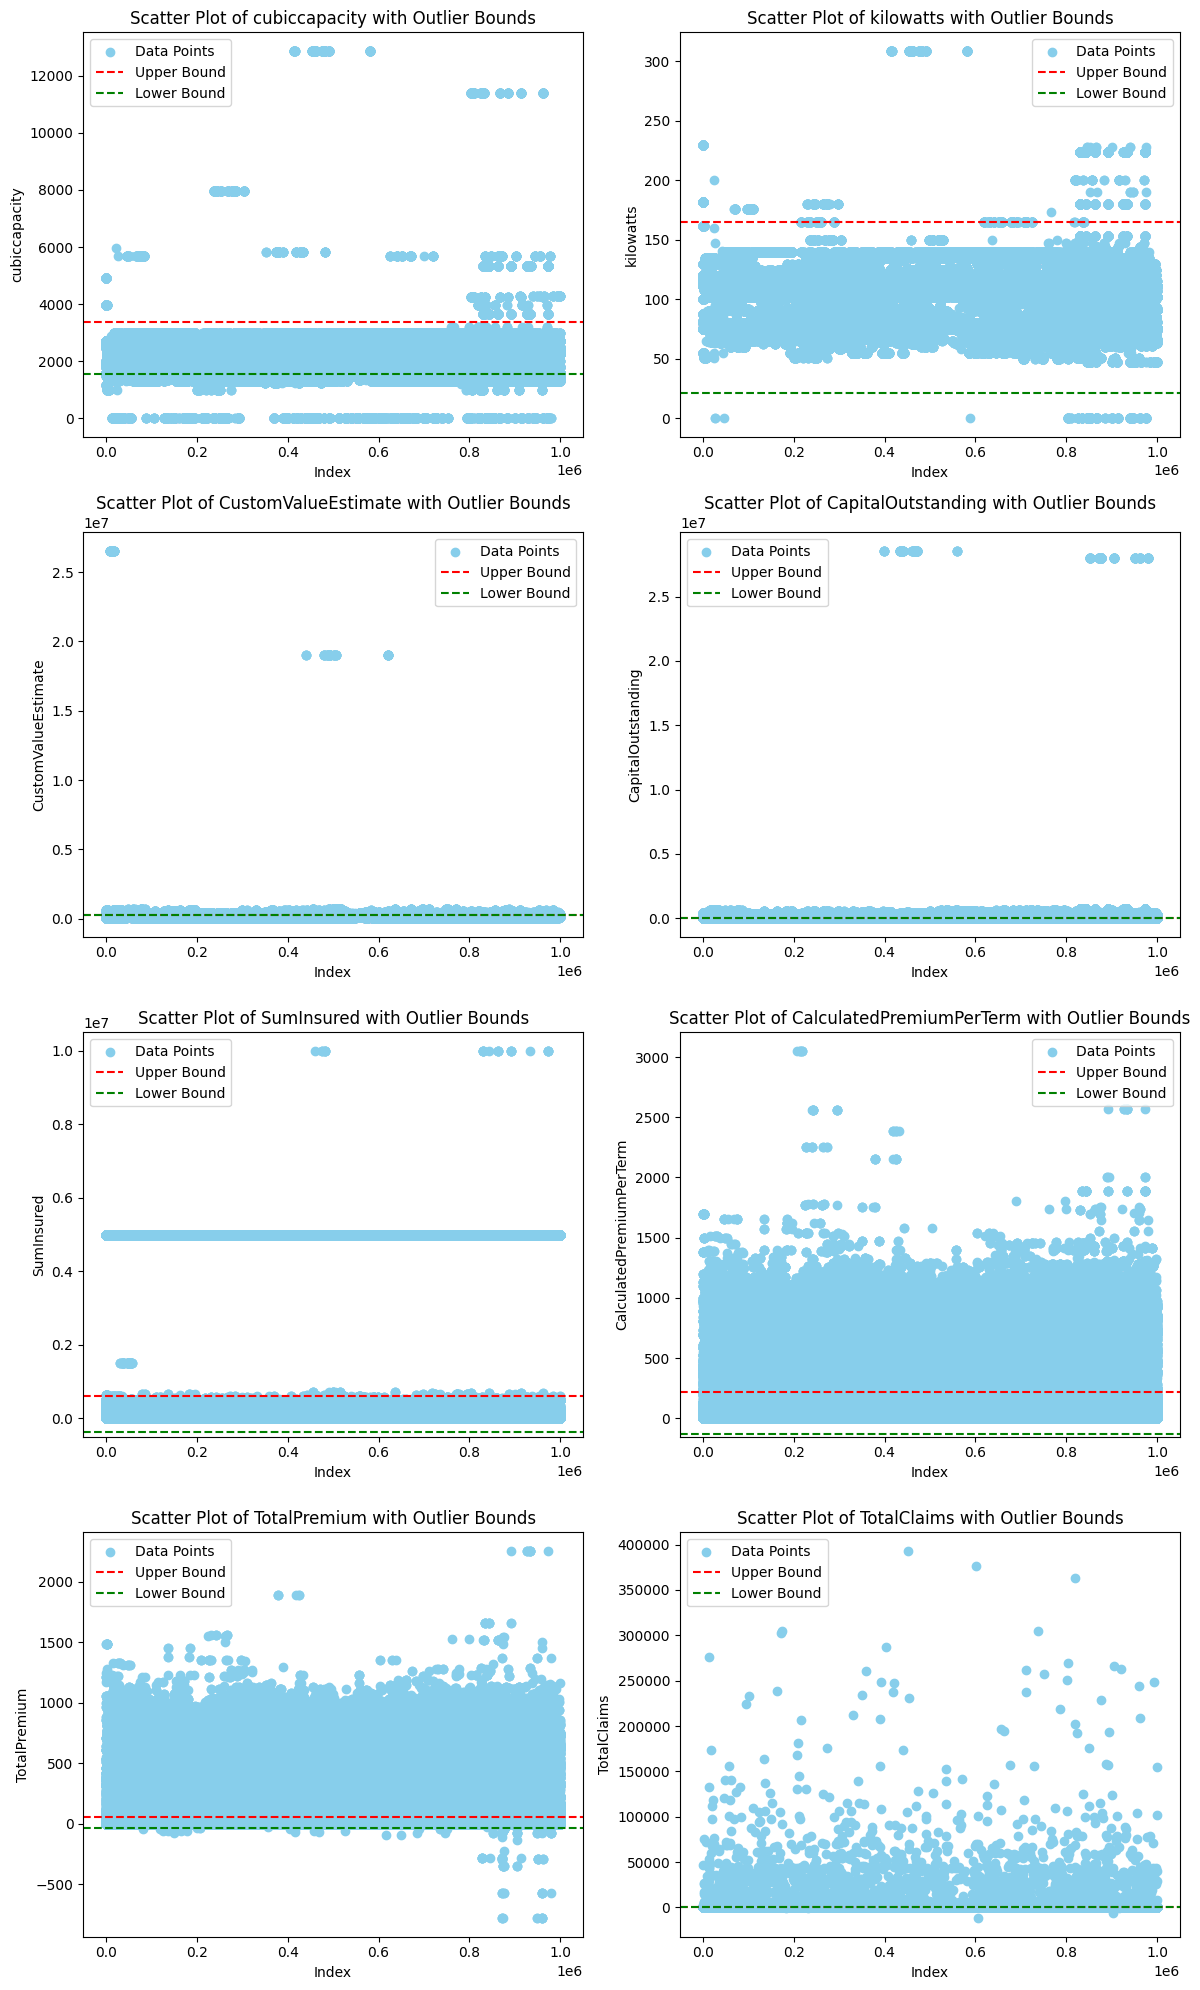

In [10]:
plot_scatter_outliers(dff, lower_bounds, upper_bounds, outlier_counts)